import modul

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

PERSIAPAN DATA & FEATURE ENGINEERING

In [12]:
df = pd.read_csv('insurance.csv')

# --- Trik Kunci Akurasi: Interaksi BMI * Smoker ---
# Kita buat fitur baru sebelum preprocessing lainnya
df['smoker_code'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df['bmi_smoker'] = df['bmi'] * df['smoker_code']
# (Kita simpan kolom smoker asli untuk encoding nanti, smoker_code hanya bantu hitung)

# Binning Target (Charges) menjadi 4 kategori seimbang
df['charges_group'] = pd.qcut(df['charges'], q=4, labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# Simpan nama kolom fitur untuk keperluan input manual nanti
# Kita lakukan encoding manual agar konsisten saat input user
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_target = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['charges_encoded'] = le_target.fit_transform(df['charges_group'])

# One-Hot Encoding untuk Region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Definisikan X dan y
X = df.drop(['charges', 'charges_group', 'charges_encoded', 'smoker_code'], axis=1)
y = df['charges_encoded']
feature_names = X.columns.tolist() # Simpan urutan kolom untuk input manual

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (Penting!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

PELATIHAN MODEL ANN

In [13]:
print("⏳ Sedang melatih model Neural Network...")
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50, 25),
                          activation='relu',
                          solver='adam',
                          alpha=0.0001,
                          max_iter=1000,
                          random_state=42)

ann_model.fit(X_train_scaled, y_train)
print("✅ Pelatihan Selesai!")

⏳ Sedang melatih model Neural Network...
✅ Pelatihan Selesai!


EVALUASI & VISUALISASI


🎯 Akurasi Model: 85.45%


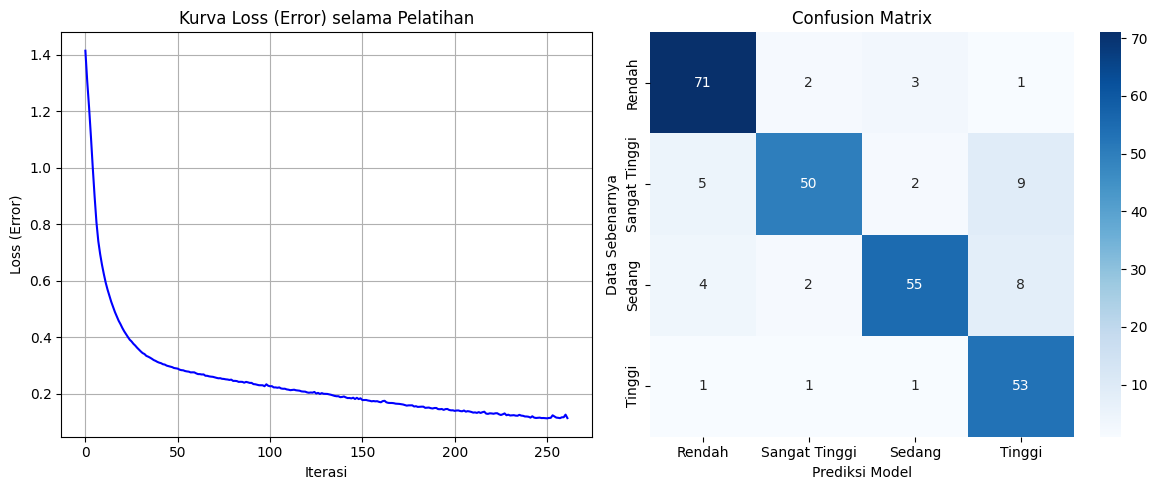

In [14]:
# A. Cek Akurasi
y_pred = ann_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Model: {acc * 100:.2f}%")

# B. Visualisasi Loss Curve (Kurva Pembelajaran)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(ann_model.loss_curve_, color='blue')
plt.title('Kurva Loss (Error) selama Pelatihan')
plt.xlabel('Iterasi')
plt.ylabel('Loss (Error)')
plt.grid(True)

# C. Visualisasi Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi Model')
plt.ylabel('Data Sebenarnya')

plt.tight_layout()
plt.show()

FITUR INPUT MANUAL (USER TEST)

In [15]:
print("\n" + "="*50)
print("🤖 PROGRAM PREDIKSI BIAYA ASURANSI (INTERAKTIF)")
print("="*50)

while True:
    print("\n--- Masukkan Data Pasien Baru ---")
    try:
        # Input Angka
        u_age = int(input("1. Umur (tahun)\t: "))
        u_bmi = float(input("2. BMI (cth: 25.5)\t: "))
        u_child = int(input("3. Jumlah Anak\t: "))

        # Input Teks (Validasi sederhana)
        while True:
            u_sex = input("4. Jenis Kelamin (male/female): ").lower()
            if u_sex in ['male', 'female']: break
            print("   ⚠️  Harap ketik 'male' atau 'female'")

        while True:
            u_smoke = input("5. Perokok? (yes/no)\t: ").lower()
            if u_smoke in ['yes', 'no']: break
            print("   ⚠️  Harap ketik 'yes' atau 'no'")

        while True:
            print("   (Pilihan: northeast, northwest, southeast, southwest)")
            u_region = input("6. Wilayah Tinggal\t: ").lower()
            if u_region in ['northeast', 'northwest', 'southeast', 'southwest']: break
            print("   ⚠️  Wilayah tidak dikenali, coba lagi.")

        # Lakukan Prediksi
        hasil = prediksi_user_baru(u_age, u_sex, u_bmi, u_child, u_smoke, u_region)

        print("-" * 40)
        print(f"💰 HASIL PREDIKSI: Biaya Asuransi Masuk Kategori [{hasil.upper()}]")
        print("-" * 40)

    except ValueError:
        print("\n❌ Terjadi kesalahan! Pastikan umur/BMI/anak diisi dengan ANGKA.")

    # Tanya mau ulang atau tidak
    lagi = input("\nCoba prediksi lagi? (y/n): ").lower()
    if lagi != 'y':
        print("\nTerima kasih telah menggunakan program ini. Sampai jumpa! 👋")
        break


🤖 PROGRAM PREDIKSI BIAYA ASURANSI (INTERAKTIF)

--- Masukkan Data Pasien Baru ---
1. Umur (tahun)	: 30
2. BMI (cth: 25.5)	: 25.5
3. Jumlah Anak	: 2
4. Jenis Kelamin (male/female): male
5. Perokok? (yes/no)	: yes
   (Pilihan: northeast, northwest, southeast, southwest)
6. Wilayah Tinggal	: northeast
----------------------------------------
💰 HASIL PREDIKSI: Biaya Asuransi Masuk Kategori [SANGAT TINGGI]
----------------------------------------

Coba prediksi lagi? (y/n): n

Terima kasih telah menggunakan program ini. Sampai jumpa! 👋
